# 基本函数

In [1]:
import matplotlib.pyplot as plt

In [19]:
?plt.subplots

In [5]:
?plt.figure

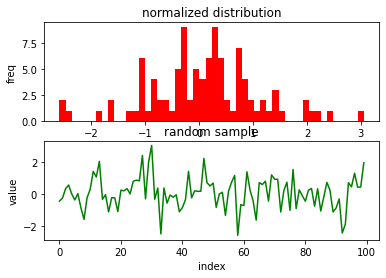

In [7]:
# example
import numpy as np


data = np.random.randn(100)

# 创建子图
fig, axs = plt.subplots(2,1)

# 填充数据、绘制图表
axs[0].hist(data, bins=50, color='red')
axs[1].plot(data, color='green')

# 参数设置
axs[0].set_title('normalized distribution')
axs[1].set_title('random sample')
axs[0].set_xlabel('value')
axs[0].set_ylabel('freq')
axs[1].set_xlabel('index')
axs[1].set_ylabel('value')

# tiao'zh

# 显示
plt.show()

# 关联性：散点图、矩阵图、热力图、日历热力图
## 散点图

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
?plt.scatter

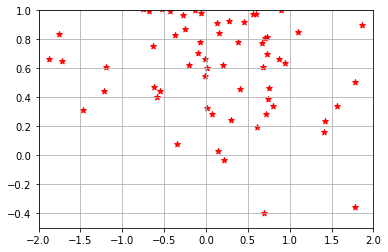

In [4]:
x = np.random.randn(100)
y = np.random.randn(100)*0.5 + np.random.randn(1)

plt.scatter(x=x,y=y,color='red',marker='*')
plt.xlim(-2,2)
plt.ylim(-0.5,1)
plt.grid()

In [5]:
# 获取数据：订单数据
data = pd.read_excel('order2019.xlsx')
data.describe()

,id,orderAmount,payment
count,104557.000000,104557.000000,104557.000000
mean,52279.000000,1049.681521,1167.494225
std,30183.150385,1054.409968,2174.024855
min,1.000000,6.100000,-12.470000
25%,26140.000000,432.040000,383.660000
50%,52279.000000,679.320000,641.230000
75%,78418.000000,1248.280000,1252.630000
max,104557.000000,28465.250000,83270.053829


In [6]:
# 探索：商品均价 vs 销售数量的相关性
types = data['goodsID'].unique().tolist()
len(types)

1001

In [7]:
prices = []
amounts = []

for t in types:
    price = data[data['goodsID']==t]['orderAmount'].mean()
    amount = len(data[data['goodsID']==t])
    
    prices.append(price)
    amounts.append(amount)

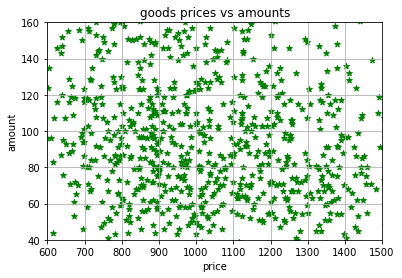

In [8]:
# 绘制散点图
plt.scatter(x=prices,y=amounts,color='green',marker='*')

plt.title('goods prices vs amounts')
plt.xlabel('price')
plt.ylabel('amount')

plt.xlim(600,1500)
plt.ylim(40,160)
plt.grid()

## 热力图：散点图坐标轴为数值型数据，热力图类别型数据，体现的是两组变量的相关性

In [9]:
# 案例背景：工厂出货品质的好坏
factories = ['fac1','fac2','fac3','fac4','fac5']
quanlity = ['bad','poor','general','good','great']
result = np.round(np.random.random(25).reshape(5,5),1)

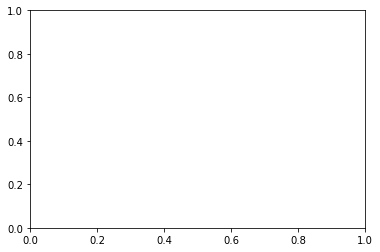

In [10]:
fig, ax = plt.subplots(1,1)
?ax.imshow

In [12]:
?plt.text

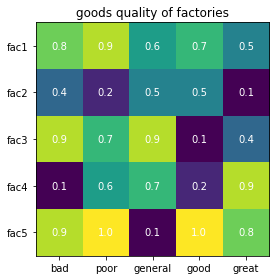

In [11]:
fig, ax = plt.subplots(1,1)

ax.imshow(result)

# 轮流锁定单元格
for i in np.arange(len(factories)):
    for j in np.arange(len(quanlity)):
        plt.text(j,i,result[i][j],color='w',ha='center',va='center')
        
# 设置坐标轴的类别数据标签
ax.set_xticks(np.arange(len(quanlity)))
ax.set_yticks(np.arange(len(factories)))
ax.set_xticklabels(quanlity)
ax.set_yticklabels(factories)

# 修饰工作
ax.set_title('goods quality of factories')
fig.tight_layout()

# 分布图：单个变量的数值分布，密度图、直方图、箱型图、堆叠直方图

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_excel('order2019.xlsx')

(6.1, 5000.0)

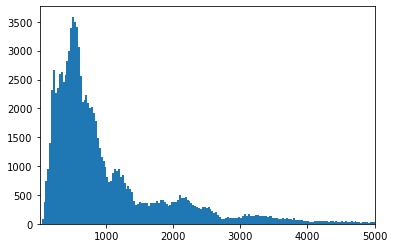

In [2]:
# 直方图：类别（数值）、频数（频率）
plt.hist(data['orderAmount'],bins=1000)
plt.xlim(data['orderAmount'].min(),5000)

(array([  6.,   0., 184.,   4.,  34.,   9.,  34.,  44.,  57.,  99.,  88.,
        102., 138., 149., 160., 177., 190., 214., 186., 207., 220., 204.,
        230., 211., 209., 210., 238., 194., 213., 232., 285., 303., 333.,
        314., 332., 404., 385., 419., 425., 427., 502., 482., 425., 482.,
        435., 475., 437., 414., 475., 422., 482., 439., 480., 469., 457.,
        490., 513., 508., 455., 453., 507., 455., 434., 494., 443., 466.,
        485., 418., 473., 433., 480., 485., 457., 484., 535., 490., 478.,
        453., 494., 539., 488., 463., 532., 493., 513., 517., 525., 539.,
        554., 610., 542., 567., 609., 570., 621., 618., 636., 637., 627.,
        577., 564., 571., 591., 628., 605., 552., 592., 577., 572., 573.,
        560., 504., 527., 490., 508., 478., 500., 426., 460., 358., 405.,
        384., 386., 323., 370., 338., 335., 358., 363., 323., 381., 378.,
        386., 389., 353., 402., 377., 395., 395., 323., 378., 352., 310.,
        339., 311., 307., 337., 307., 

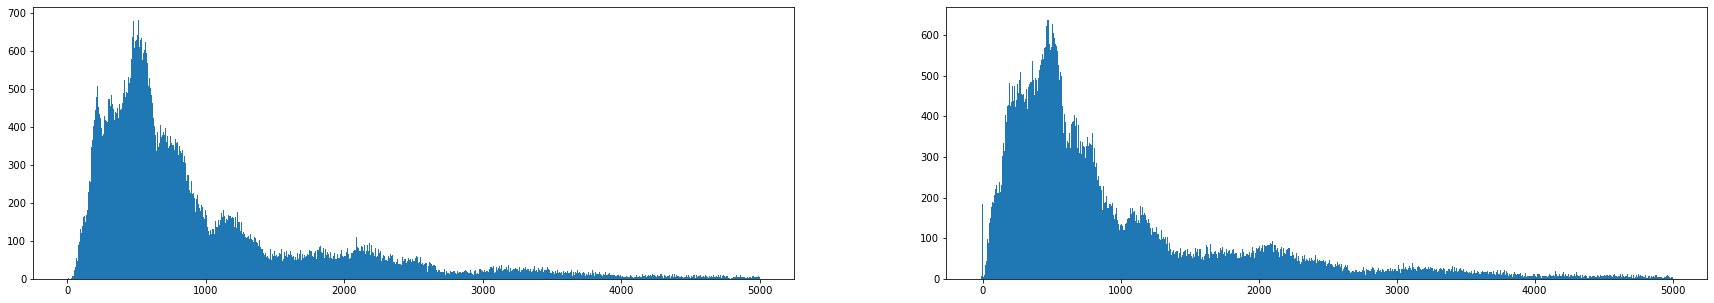

In [3]:
# plt.figure(figsize=(30, 5))
fig, ax = plt.subplots(1,2, figsize=(30, 5))
ax[0].hist(data['orderAmount'], bins=1000, range=(data['orderAmount'].min(),5000))
# plt.xlim(data['orderAmount'].min(),5000)
# fig[0].xlim(data['orderAmount'].min(),5000)
ax[1].hist(data['payment'],bins=1000, range=(data['payment'].min(),5000))
# plt.xlim(data['payment'].min(),5000)
# fig[1].xlim(data['payment'].min(),5000)

In [16]:
?plt.hist

# 箱型图：1、单个变量 2、加入比较变量

(0.0, 2000.0)

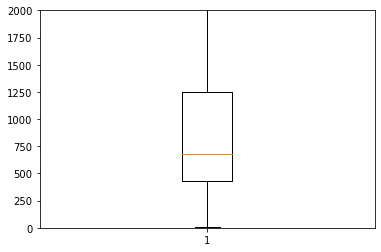

In [4]:
plt.boxplot(data['orderAmount']) # payment
plt.ylim(0,2000)

In [6]:
# 比较orderamount 和 payment 金额分布表现
data2 = data[['orderAmount','payment']].T
data2

,0,1,2,3,4,5,6,7,8,9,...,104547,104548,104549,104550,104551,104552,104553,104554,104555,104556
orderAmount,272.51,337.93,905.68,786.27,550.77,425.2,1764.37,499.41,1103.00,465.41,...,1544.96,280.39,633.77,597.41,206.92,186.37,138.81,2632.27,1206.76,3053.70
payment,272.51,337.93,891.23,688.88,542.51,425.2,1707.04,480.42,1050.95,465.41,...,1379.23,256.74,633.77,576.89,161.28,126.21,138.81,2632.27,1029.46,2982.26


In [7]:
data2.index.tolist()

['orderAmount', 'payment']

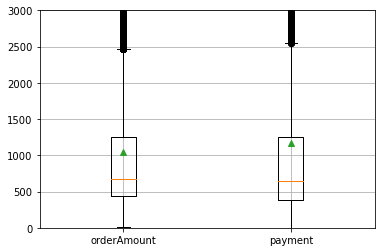

In [9]:
plt.boxplot(data[['orderAmount','payment']], showmeans=True, labels=data2.index.tolist())
plt.ylim(0,3000)
plt.grid()

# 变化图：随着时间的趋势变化，折线图、堆叠面积图

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

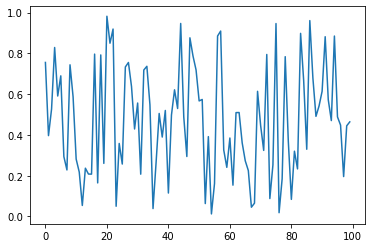

In [2]:
sample1 = np.random.random(100)
plt.plot(sample1)

(0.0, 1.0)

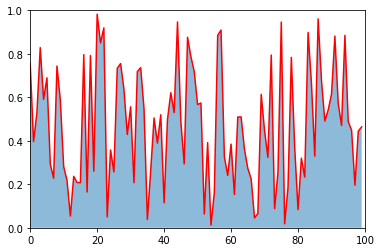

In [4]:
plt.plot(sample1,color='red')
plt.fill_between(np.arange(100),y1=sample1,y2=0,alpha=0.5)
plt.xlim(0,100)
plt.ylim(0,1)

In [5]:
?plt.fill_between

## 股票数据示例：日期、价格

In [6]:
dates = pd.date_range('20180101','20210101',freq='M')
dates

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')

In [15]:
dates_list = list(dates.date)
str(dates_list[0]), str(dates_list[-1])

('2018-01-31', '2020-12-31')

In [19]:
pd.date_range(end='20210101', periods=8, freq='M')

DatetimeIndex(['2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')

In [20]:
def get_price(size):
    return np.cumsum(np.random.randn(size))

size = len(dates)
price1 = get_price(size)
price2 = get_price(size)
price3 = get_price(size)

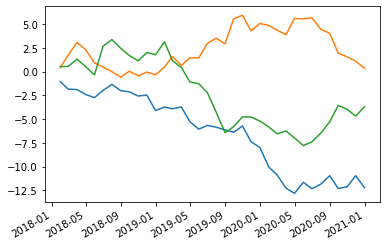

In [21]:
fig,ax = plt.subplots(1,1)

ax.plot(dates,price1)
ax.plot(dates,price2)
ax.plot(dates,price3)

fig.autofmt_xdate() # 自动调整x轴标签显示方式，以完整显示

<AxesSubplot:>

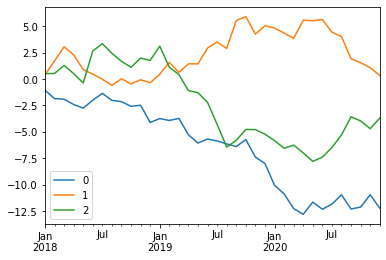

In [22]:
# 整合成dataframe -> 再直接绘图
data = pd.DataFrame([price1,price2,price3]).T
data.index = dates
data.plot()

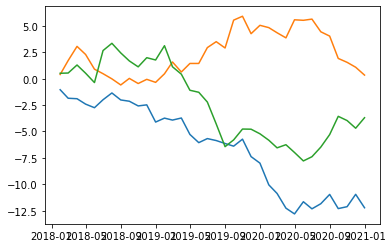

In [23]:
plt.plot(data)

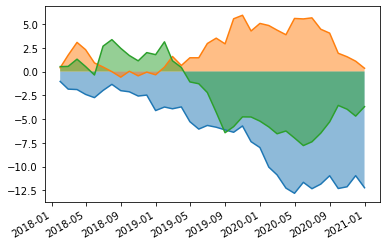

In [24]:
# 创建未堆叠面积图
fig,ax = plt.subplots(1,1)

ax.plot(dates,price1)
ax.plot(dates,price2)
ax.plot(dates,price3)

fig.autofmt_xdate() # 自动调整x轴标签显示方式，以完整显示

# 填充颜色、面积
plt.fill_between(dates,y1=price1,alpha=0.5)
plt.fill_between(dates,y1=price2,alpha=0.5)
plt.fill_between(dates,y1=price3,alpha=0.5)

# 组成图：个体与总体占比关系，饼图、条形图、树形图

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# 获取数据
df = pd.read_excel('order2019.xlsx')

([<matplotlib.patches.Wedge at 0x7f8d7d4dc940>,
 [Text(1.0461621663333946, 0.3399186987098808, 'a'),
  Text(0.40172206953590384, 1.2363734787060867, 'b'),
  Text(-1.0461621902025062, 0.3399186252483017, 'c'),
  Text(0.3399188211458418, -1.0461621265515308, 'd')],
 [Text(0.5706339089091244, 0.1854101992962986, '10.0%'),
  Text(0.24721358125286386, 0.7608452176652841, '20.0%'),
  Text(-0.5706339219286397, 0.18541015922634638, '30.0%'),
  Text(0.18541026607955005, -0.5706338872099259, '40.0%')])

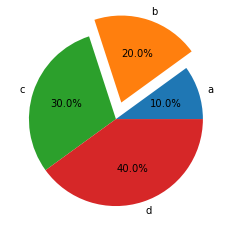

In [3]:
## 饼图：1、简单饼图+样式  2、交易渠道金额占比图
data = [0.1,0.2,0.3,0.4]
plt.pie(data, labels=['a','b','c','d'], explode=[0,0.2,0,0],
        autopct='%.1f%%')

In [4]:
# 计算各chanelID的payment总额
data2 = df[['chanelID','payment']]
res = data2.groupby('chanelID').sum()
res.head()

,payment
chanelID,
渠道-0007,9.544331e+06
渠道-0168,4.560486e+06
渠道-0191,3.849866e+06
渠道-0283,7.444815e+06
渠道-0318,3.450479e+06


([<matplotlib.patches.Wedge at 0x7f8d80833eb0>,
 [Text(1.0669727213304352, 0.2675242268220315, '渠道-0007'),
  Text(0.9024185443519844, 0.6289998178136825, '渠道-0168'),
  Text(0.7462514267319141, 0.8081514759626334, '渠道-0191'),
  Text(0.48328594018113336, 0.9881471044451015, '渠道-0283'),
  Text(0.19090705139484004, 1.0833072037643467, '渠道-0318'),
  Text(0.025951637057712838, 1.0996938267236136, '渠道-0330'),
  Text(-0.31358827963385066, 1.054354015915092, '渠道-0396'),
  Text(-0.687248531270949, 0.8588885004853213, '渠道-0465'),
  Text(-1.0185073217517489, 0.4155031113458475, '渠道-0530'),
  Text(-1.0924794681548546, -0.12840798908201184, '渠道-0568'),
  Text(-0.946776426365767, -0.5600128556364288, '渠道-0765'),
  Text(-0.6723652806671898, -0.8705888405862616, '渠道-0789'),
  Text(-0.0633464209948299, -1.0981744993156353, '渠道-0896'),
  Text(0.6507860611028184, -0.8868356683592958, '渠道-0985'),
  Text(1.0226827556390505, -0.4051172439165212, '渠道-9527')],
 [Text(0.5819851207256919, 0.14592230553928986, '7

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 28192 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 36947 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 28192 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 36947 missing from current font.
  font.set_text(s, 0, flags=flags)


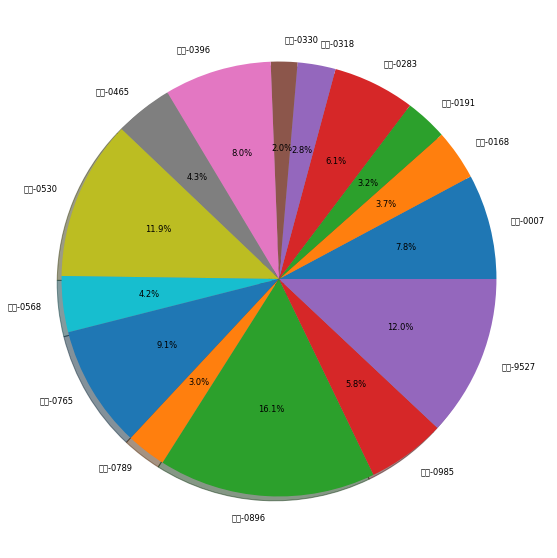

In [5]:
plt.figure(figsize=(10, 10))
plt.pie(res['payment'],labels=res.index, autopct='%.1f%%', shadow=True,
       textprops={'size':'smaller'})

In [6]:
## 条形图：1、简单条形图+样式  3、交易渠道金额占比图
data

[0.1, 0.2, 0.3, 0.4]

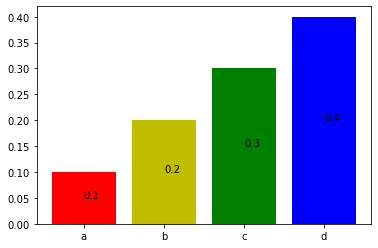

In [7]:
labels=['a','b','c','d']
plt.bar(labels, data, color=['r','y','g','b']) # 颜色
# 设置数值标签
for x,y in zip(labels,data):
    plt.text(x,(y/2),y)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

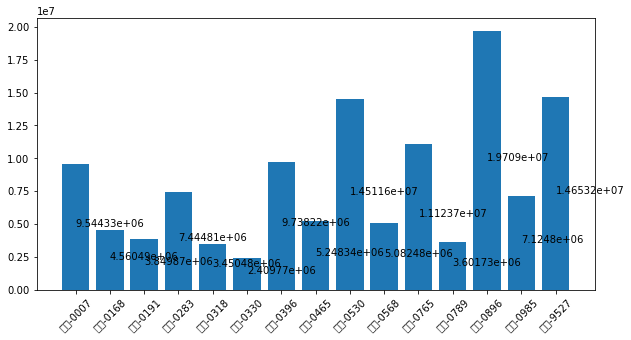

In [8]:
plt.figure(figsize=(10,5))
plt.bar(res.index,res['payment'])
# 设置数值标签
for x,y in zip(res.index.tolist(),res['payment'].tolist()):
    plt.text(x,(y/2),'{:g}'.format(y))
# 旋转标签
plt.xticks(rotation=45)

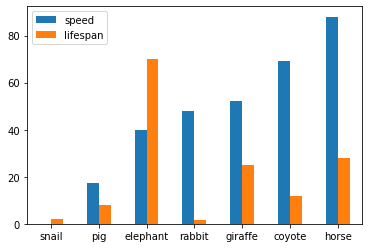

In [9]:
import pandas as pd
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
ax = df.plot.bar(rot=0)

# 分组：关注数据样本内部，不同分组数据的表现差异

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# 获取数据
df = pd.read_excel('order2019.xlsx')

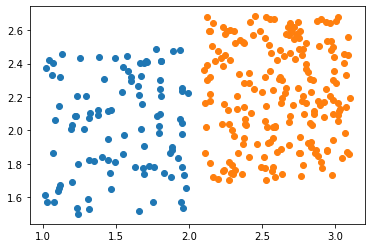

In [2]:
## 散点簇形图：颜色区分
a_x = np.random.random(100) + 1
a_y = np.random.random(100) + 1.5
b_x = np.random.random(200) + 2.1
b_y = np.random.random(200) + 1.7

plt.scatter(a_x,a_y)
plt.scatter(b_x,b_y)

<BarContainer object of 4 artists>

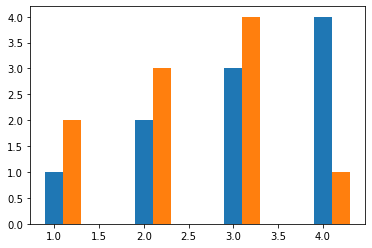

In [3]:
## 分组条形图：1、颜色区分 2、引流渠道vs支付渠道
x = ['a','b','c','d']
axis1 = [1,2,3,4]
axis2 = [1.2,2.2,3.2,4.2]
y1 = [1,2,3,4]
y2 = [2,3,4,1]

plt.bar(axis1,y1,width=0.2)
plt.bar(axis2,y2,width=0.2)

In [4]:
# 订单数据：渠道、支付平台、支付金额
chanels = df['chanelID'].unique().tolist()[:3]

df2 = df[(df['chanelID']==chanels[0]) | (df['chanelID']==chanels[1]) 
         | (df['chanelID']==chanels[2])]

df2 = df2[['chanelID','platfromType','payment']]
df2

,chanelID,platfromType,payment
0,渠道-0396,APP,272.51
1,渠道-0765,Wech atMP,337.93
2,渠道-0530,We c hatMP,891.23
3,渠道-0530,WEB,688.88
5,渠道-0765,Wech atMP,425.20
...,...,...,...
104539,渠道-0396,Wech atMP,1620.03
104541,渠道-0396,APP,877.29
104543,渠道-0530,APP,85.27
104545,渠道-0530,APP,127.23


In [5]:
res = df2.groupby(['chanelID','platfromType']).sum()
res

payment
chanelID platfromType              
渠道-0396  AL i MP       2.094863e+04
         ALiM P        1.350152e+05
         AP P          6.770314e+05
         APP           3.822016e+06
         WE B          7.600349e+04
         WEB           6.028438e+05
         Wap           1.203890e+03
         We c hatMP    5.566079e+05
         Wech atMP     3.834436e+06
         Wech atShop   1.211701e+04
渠道-0530  AL i MP       4.186280e+04
         ALiM P        1.916733e+05
         AP P          8.756512e+05
         APP           5.581815e+06
         WE B          9.807031e+04
         WEB           8.537743e+05
         We c hatMP    8.070950e+05
         We c hatShop  7.558300e+02
         Wech atMP     6.040621e+06
         Wech atShop   2.030326e+04
渠道-0765  AL i MP       2.842479e+04
         ALiM P        1.778161e+05
         AP P          6.367093e+05
         APP           4.420494e+06
         WE B          8.613528e+04
         WEB           6.129048e+05
         We c hatMP    7.838473e+05
         Wech atMP     4.372428e+06
         Wech atShop   4.921460e+03

<ipython-input-7-1d5cdcfa5c5c>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=labels1,rotation=45)


[Text(0.0, 0, 'AL i MP'),
 Text(2.0, 0, 'ALiM P'),
 Text(4.0, 0, 'AP P '),
 Text(6.0, 0, 'APP '),
 Text(8.0, 0, 'WE B '),
 Text(10.0, 0, 'WEB '),
 Text(12.0, 0, 'Wap  ')]

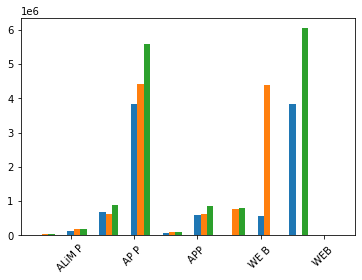

In [7]:
# 创建子图
fig, ax = plt.subplots()

# x轴分组位置设置
labels1 = res.loc[chanels[0],:].index.tolist()
labels2 = res.loc[chanels[1],:].index.tolist()
labels3 = res.loc[chanels[2],:].index.tolist()
size = len(labels1)
plt.bar(np.arange(size)+1, res.loc[chanels[0],'payment'].tolist(), width=0.2)
plt.bar(np.arange(len(labels2))+1.2, res.loc[chanels[1],'payment'].tolist(), width=0.2)
plt.bar(np.arange(len(labels3))+1.4, res.loc[chanels[2],'payment'].tolist(), width=0.2)

# x轴类别数据
ax.set_xticklabels(labels=labels1,rotation=45)

# 偏差：数据样本内部的差异，通常会关注数据样本与某个指标的差异性，更注重差异的呈现

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# 获取数据：订单数据
data = pd.read_excel('order2019.xlsx')

res = data[['chanelID','payment']].groupby('chanelID').sum()

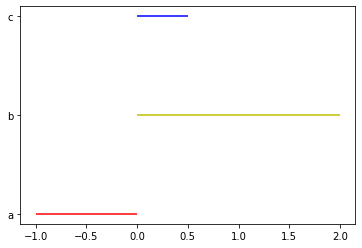

In [3]:
# 发散型条形图：交易额差值排序

# 简单实例
plt.hlines(y=['a','b','c'],xmin=0, xmax=[-1,2,0.5],colors=['r','y','b'])

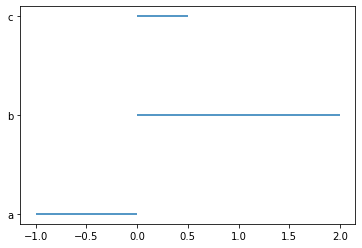

In [4]:
# 发散型条形图：交易额差值排序

# 简单实例
plt.hlines(y=['a','b','c'],xmin=0, xmax=[-1,2,0.5])

In [5]:
res = res.sort_values('payment',ascending=True)
res['colors'] = ['red' if x > 10000000 else 'green' for x in res['payment']]
res

,payment,colors
chanelID,,
渠道-0330,2.409767e+06,green
渠道-0318,3.450479e+06,green
渠道-0789,3.601731e+06,green
渠道-0191,3.849866e+06,green
渠道-0168,4.560486e+06,green
渠道-0568,5.082479e+06,green
渠道-0465,5.248341e+06,green
渠道-0985,7.124801e+06,green
渠道-0283,7.444815e+06,green


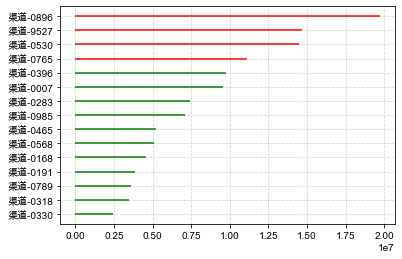

In [6]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.hlines(y=res.index, xmin=0, xmax=res['payment'],colors=res['colors'])
plt.grid(linestyle='--',alpha=0.5)

In [7]:
## 面积图：交易额差值排序

res['error'] = res['payment'] - res['payment'].mean()
res = res.sort_values('chanelID')
res

,payment,colors,error
chanelID,,,
渠道-0007,9.544331e+06,green,1.407480e+06
渠道-0168,4.560486e+06,green,-3.576366e+06
渠道-0191,3.849866e+06,green,-4.286986e+06
渠道-0283,7.444815e+06,green,-6.920371e+05
渠道-0318,3.450479e+06,green,-4.686373e+06
渠道-0330,2.409767e+06,green,-5.727085e+06
渠道-0396,9.738223e+06,green,1.601371e+06
渠道-0465,5.248341e+06,green,-2.888511e+06
渠道-0530,1.451162e+07,red,6.374771e+06


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

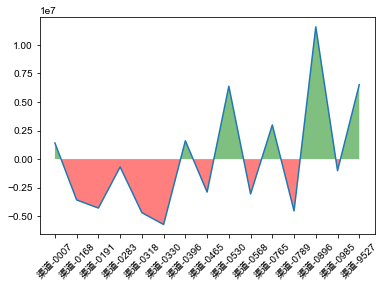

In [9]:
plt.plot(res['error'])
plt.fill_between(res.index,res['error'],0,where=res['error']>0,facecolor='green',interpolate=True,alpha=0.5)
plt.fill_between(res.index,res['error'],0,where=res['error']<0,facecolor='red',interpolate=True,alpha=0.5)
plt.xticks(rotation=45)